# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  15 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов
* Задача 4 &mdash;  40 баллов





-----

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import scipy.stats as sps
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

---
## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Необходимо убрать выбрасы, дерево на них чувствительно, также преобразовать категориальные признаки. Поскольку каждый признак обрабатывается отдельно, а возможные разбиения данных не зависят от масштабирования, алгоритмы деревьев решений не нуждаются в таких процедурах предварительной обработки, как нормализация или стандартизация признаков. Имеет смысл иногда применять монотонные функции (например, log, именно log(функции правдоподобия) минимизируется). Линейность не играет значения в решающем дереве, в отличие от LinearRegression. Регрессия в деревьях представлена кусочно-постоянной функцией, так что немонотонные функции и нелинейные функции не преграда


## Задача 2

### 1. Загрузка и предобработка данных.




Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`. С сырыми данными и более подробным описанием задачи можно ознакомиться также [здесь](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification).


In [19]:
data = pd.read_csv('Crystal_structure.csv')
data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,False,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,False,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,False,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


Сделаем предобработку данных.

In [20]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

C:\Users\User\AppData\Local\Temp\ipykernel_20920\2274344533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [34]:
data.shape
data

,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion
0,0,0,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000,0
1,0,1,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571,1
2,0,2,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714,0
3,0,3,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429,1
4,0,4,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,72,68,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857,0
5272,72,69,0,0,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857,0
5273,72,70,0,0,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571,1
5274,72,71,0,0,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571,0


In [51]:

X = data.iloc[:, :14]
y = data.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Обучите модель решающего дерева.

In [54]:

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Сделайте предсказание для тестовой выборки.

In [62]:
pred = model.predict(X_test)
pred

array([1., 1., 0., ..., 0., 1., 1.])

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [63]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, ..., 0, 0, 2])

In [71]:
success = []
success = np.multiply((pred == y_test), 1)

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [87]:
alpha = 0.05

z = sps.norm.ppf(1-alpha/2)
dov_int = (success.mean() - z * np.sqrt(success.mean()*(1 - success.mean()) /success.size),
           success.mean() + z*np.sqrt(success.mean()*(1 - success.mean())/success.size))
dov_int

(0.6818792900342171, 0.7268383347288908)

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [88]:

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test = np.array(y_test)
success = np.multiply((pred == y_test), 1)
alpha = 0.05

z = sps.norm.ppf(1-alpha/2)
dov_int = (success.mean() - z * np.sqrt(success.mean()*(1 - success.mean()) /success.size),
           success.mean() + z*np.sqrt(success.mean()*(1 - success.mean())/success.size))
dov_int

(0.6709106703116525, 0.7163287485133634)

**Выводы:** Доверительный интервал сузился, то есть дерево уже успешнее обучилось

## Задача 3

Рассмотрим данные из <a href='https://miptstats.github.io/courses/ad_mipt/hw8.html' target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Нижняя граница значений признака 0:  -0.1503620257132154
Верхняя граница значений признака 0:  0.1511386657214078

Нижняя граница значений признака 1:  -0.18762426937720053
Верхняя граница значений признака 1:  0.19366275161003024

Нижняя граница значений признака 2:  -0.13244469328910888
Верхняя граница значений признака 2:  0.12946364066395025

Нижняя граница значений признака 3:  -0.14510687365125285
Верхняя граница значений признака 3:  0.14409426462259314

Нижняя граница значений признака 4:  -0.12815662277471535
Верхняя граница значений признака 4:  0.12226679741789037

Нижняя граница значений признака 5:  -0.12066258492575405
Верхняя граница значений признака 5:  0.12014858219039615

Нижняя граница значений признака 6:  -0.13176015295011648
Верхняя граница значений признака 6:  0.12595449333597827

Нижняя граница значений признака 7:  -0.1501967455018192
Верхняя граница значений признака 7:  0.1450122215054536

Нижняя граница значений признака 8:  -0.13177180678846734
Верхняя гр

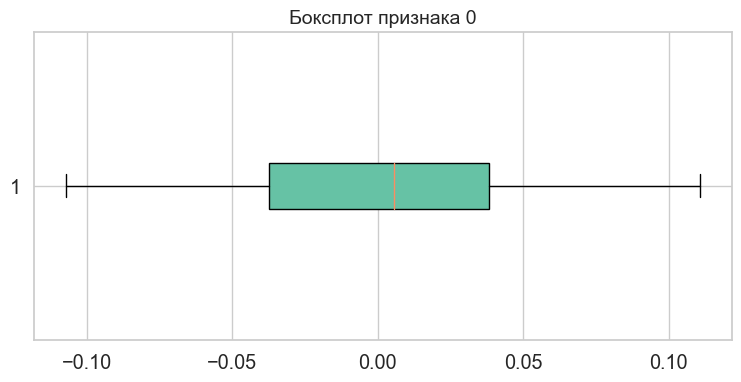

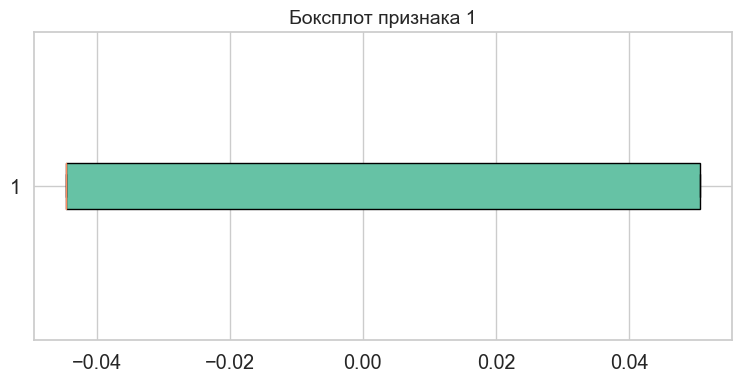

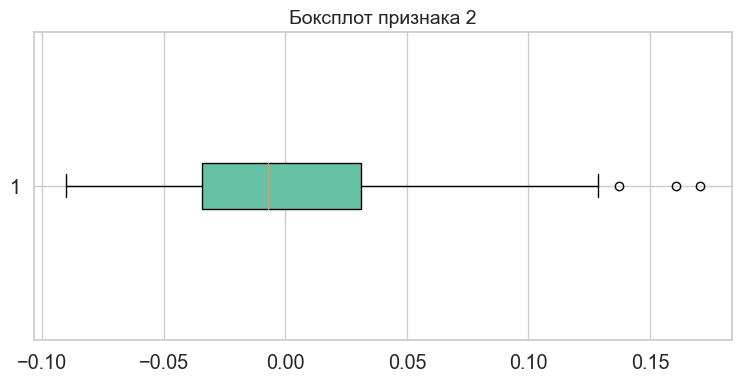

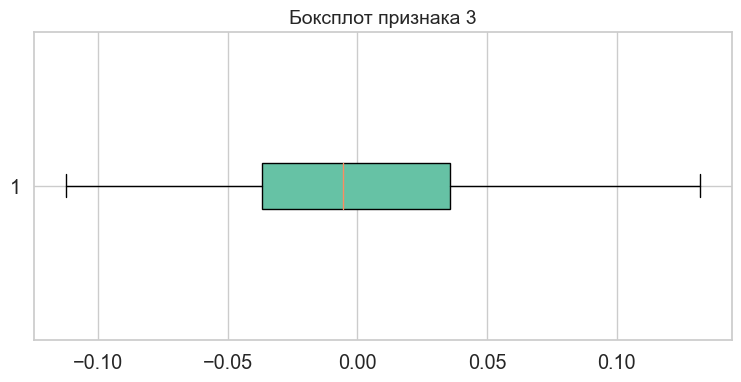

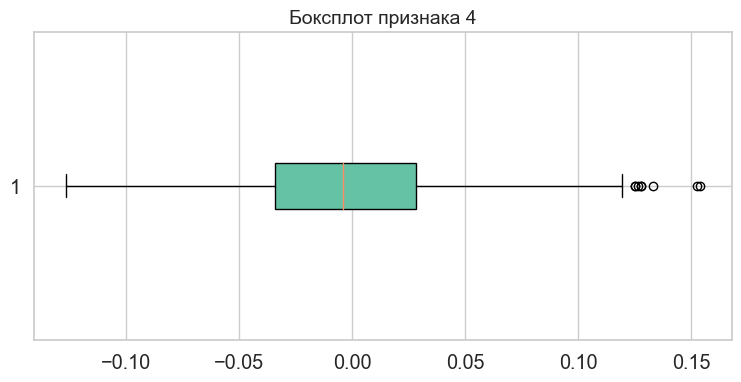

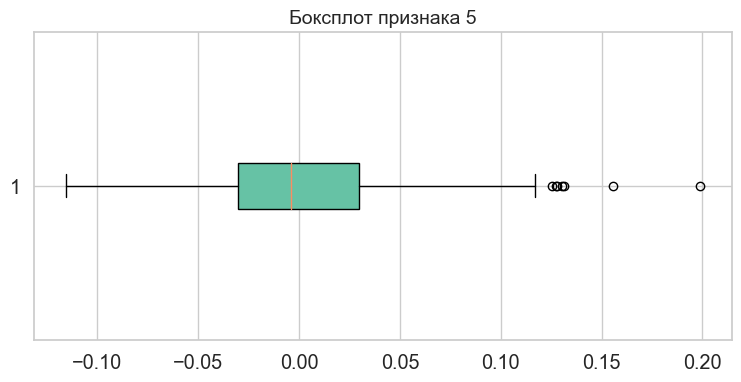

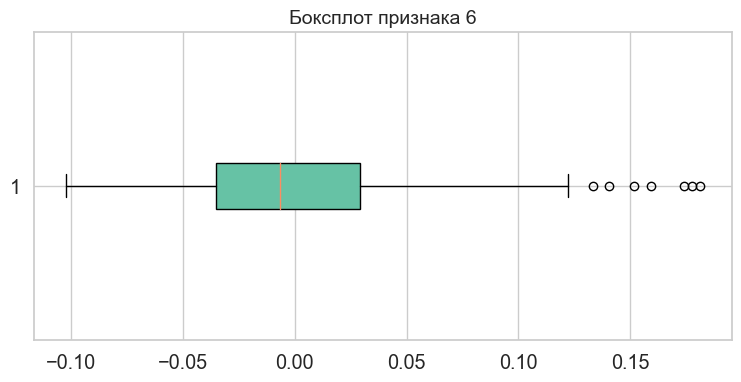

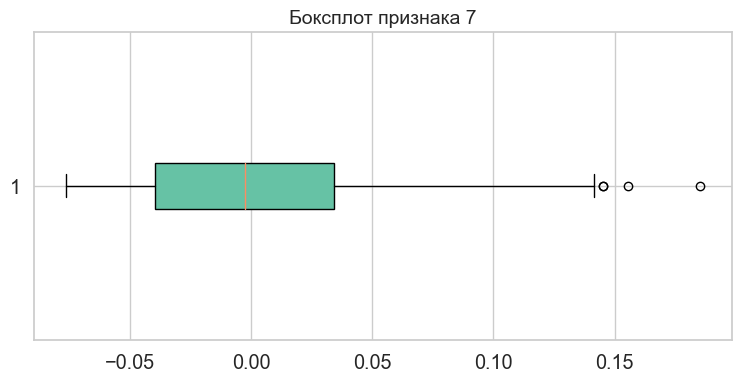

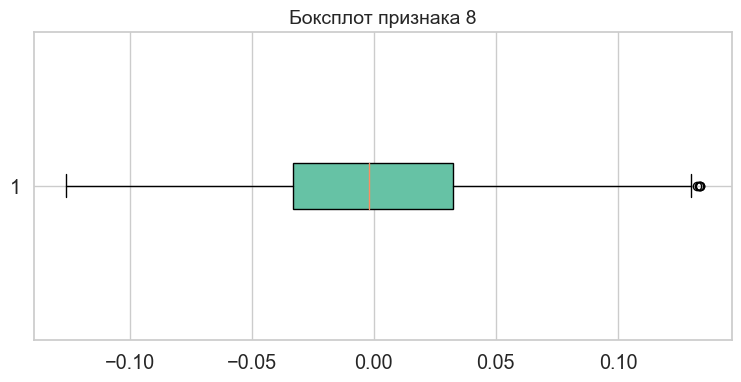

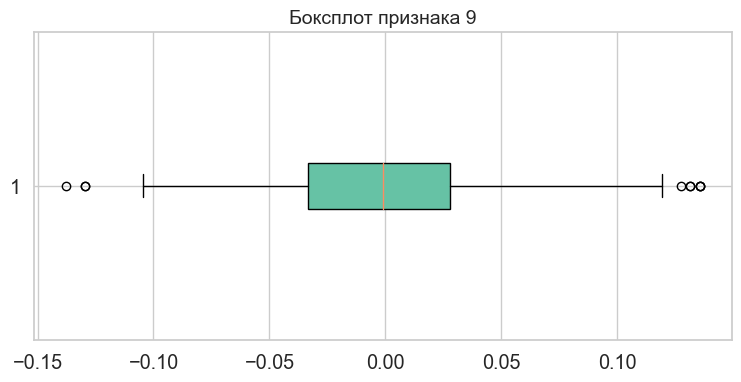

In [212]:

data = load_diabetes()
X, y = data['data'], data['target']

#чистка от выбросов
upper = []
for i in range(10):
    plt.figure(figsize=(9, 4))
    plt.boxplot(x = X[:,i], vert=False, patch_artist=True)
    plt.title(f'Боксплот признака {i}', fontsize=14)
    Q1 = np.quantile(X[:,i], 0.25)
    Q3 = np.quantile(X[:,i], 0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    upper.append(upper_fence)
    print(f'Нижняя граница значений признака {i}: ', lower_fence)
    print(f'Верхняя граница значений признака {i}: ', upper_fence)
    print()
plt.show()

Верхняя граница значений признака 4:  0.12226679741789037



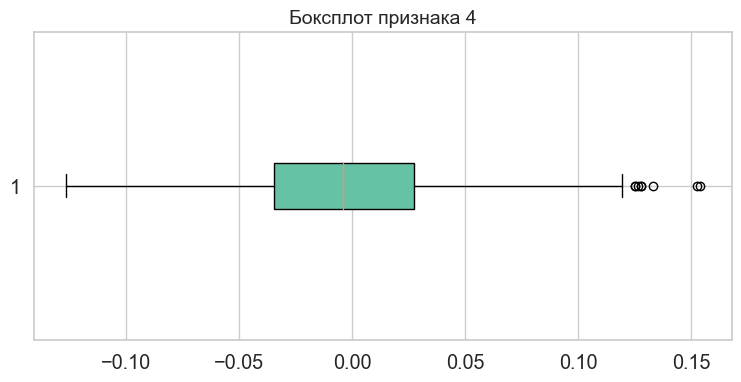

In [275]:
#убрали выбрасы 2 признака
mat = np.concatenate((X, y[:,np.newaxis]), axis=1)
mat = mat[X[:, 2] <= upper[2]]

#разбираемся с 4 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,4], vert=False, patch_artist=True)
plt.title('Боксплот признака 4', fontsize=14)
Q1 = np.quantile(X[:,4], 0.25)
Q3 = np.quantile(X[:,4], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 4: ', upper_fence)
print()
plt.show()

mat = mat[mat[:, 4] <= upper_fence]

Верхняя граница значений признака 5:  0.12014858219039615



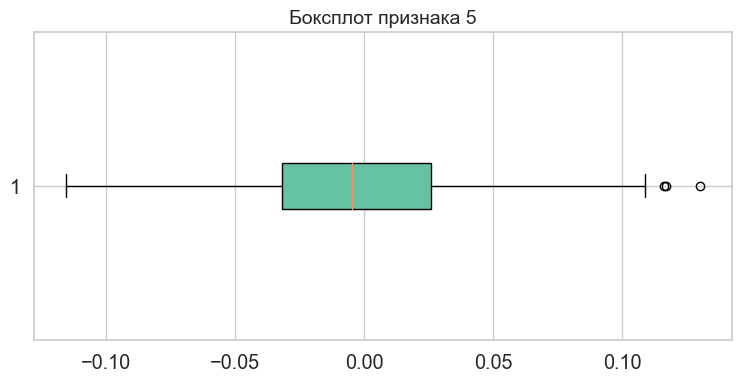

In [276]:
#разбираемся с 5 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,5], vert=False, patch_artist=True)
plt.title('Боксплот признака 5', fontsize=14)
Q1 = np.quantile(X[:,5], 0.25)
Q3 = np.quantile(X[:,5], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 5: ', upper_fence)
print()
plt.show()

mat = mat[mat[:, 5] <= upper_fence]

Верхняя граница значений признака 6:  0.12595449333597827



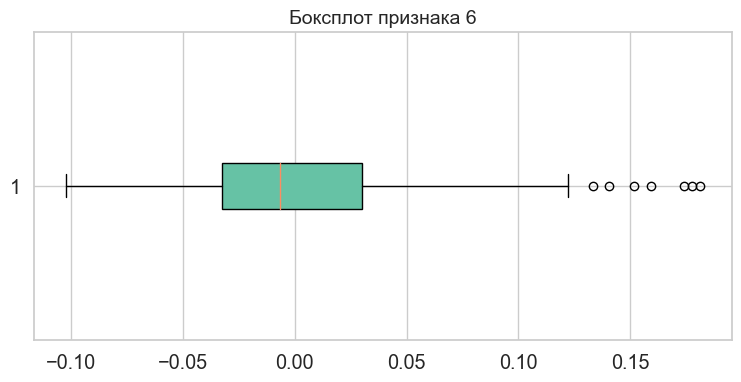

In [277]:
#разберемся с 6 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,6], vert=False, patch_artist=True)
plt.title('Боксплот признака 6', fontsize=14)
Q1 = np.quantile(X[:,6], 0.25)
Q3 = np.quantile(X[:,6], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 6: ', upper_fence)
print()
plt.show()

mat = mat[mat[:, 6] <= upper_fence]

Верхняя граница значений признака 7:  0.1450122215054536



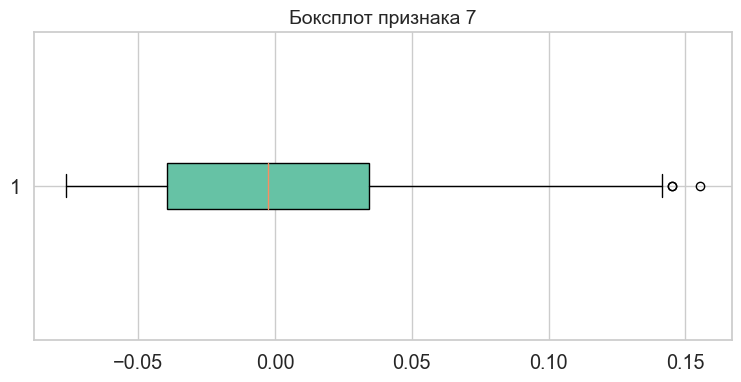

In [278]:
#разберемся с 7 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,7], vert=False, patch_artist=True)
plt.title('Боксплот признака 7', fontsize=14)
Q1 = np.quantile(X[:,7], 0.25)
Q3 = np.quantile(X[:,7], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 7: ', upper_fence)
print()
plt.show()

mat = mat[mat[:, 7] <= upper_fence]

Верхняя граница значений признака 8:  0.13095624532044345



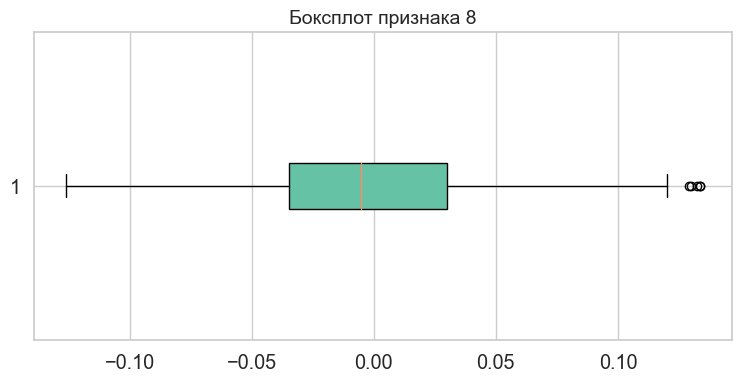

In [279]:
#разберемся с 8 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,8], vert=False, patch_artist=True)
plt.title('Боксплот признака 8', fontsize=14)
Q1 = np.quantile(X[:,8], 0.25)
Q3 = np.quantile(X[:,8], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 8: ', upper_fence)
print()
plt.show()

mat = mat[mat[:, 8] <= upper_fence]

Верхняя граница значений признака 9:  0.11956116639409461
Нижняя граница значений признака 9:  -0.1248231415811534



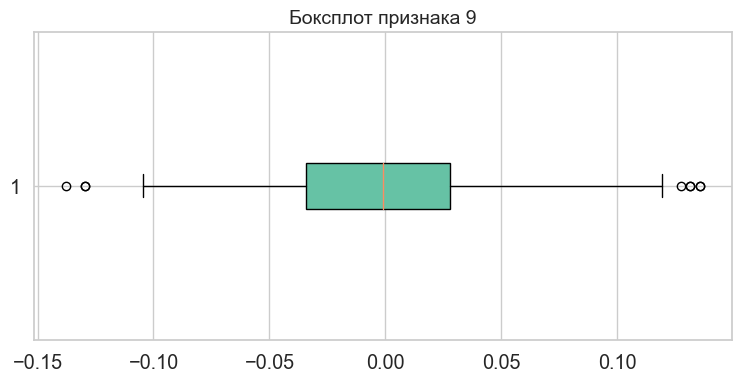

In [285]:
#разберемся с 9 признаком
plt.figure(figsize=(9, 4))
plt.boxplot(x = mat[:,9], vert=False, patch_artist=True)
plt.title('Боксплот признака 9', fontsize=14)
Q1 = np.quantile(X[:,9], 0.25)
Q3 = np.quantile(X[:,9], 0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print('Верхняя граница значений признака 9: ', upper_fence)
lower_fence = Q1 - (1.5 * IQR)
print(f'Нижняя граница значений признака {i}: ', lower_fence)
print()
plt.show()

mat = mat[mat[:, 9] <= upper_fence]  
mat = mat[mat[:, 9] >= lower_fence]

In [286]:
mat.shape

(409, 11)

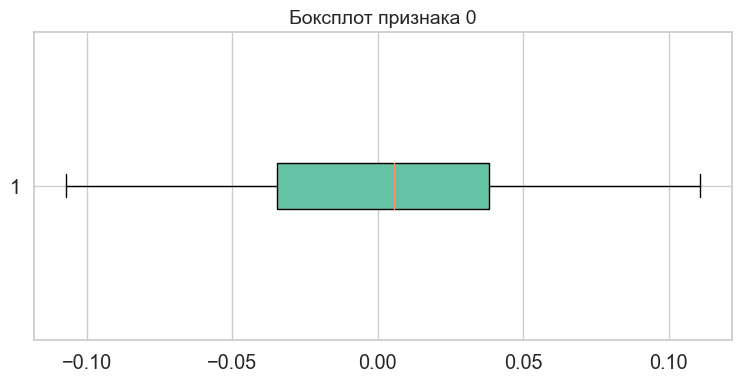

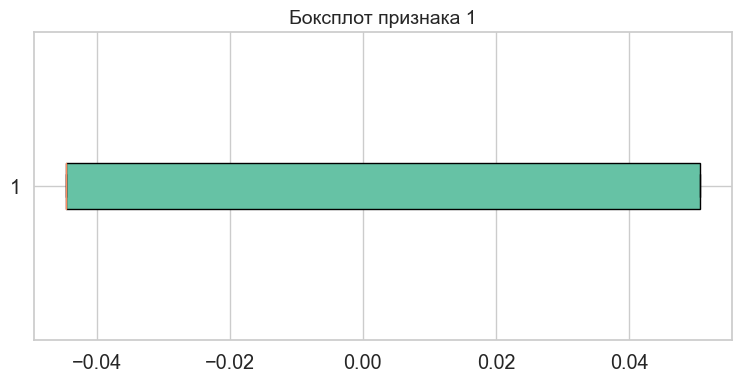

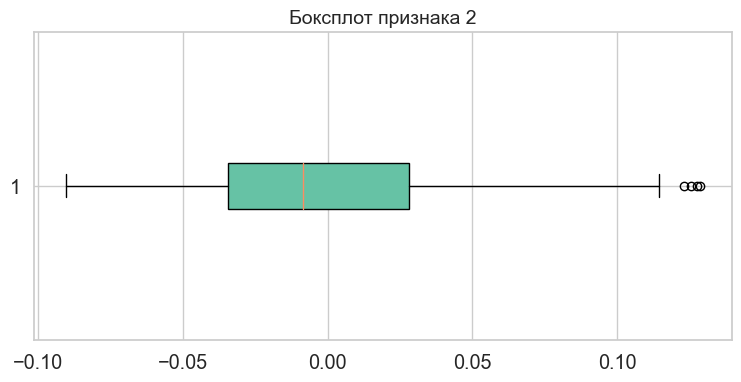

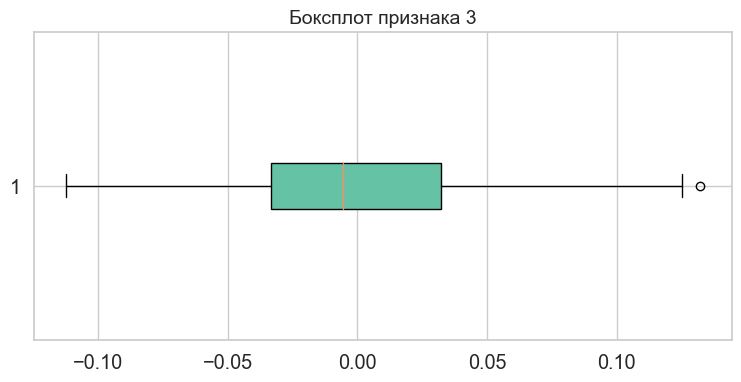

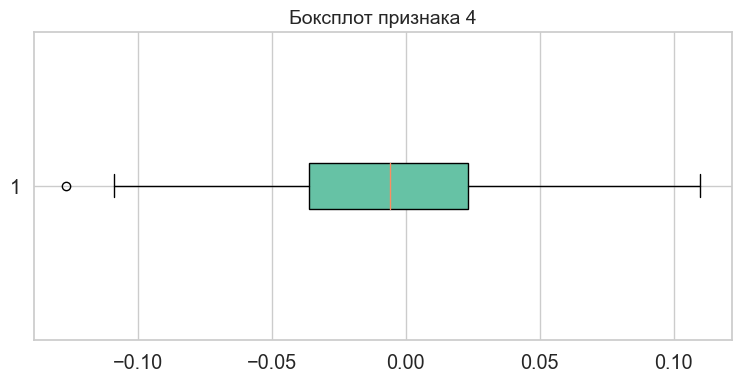

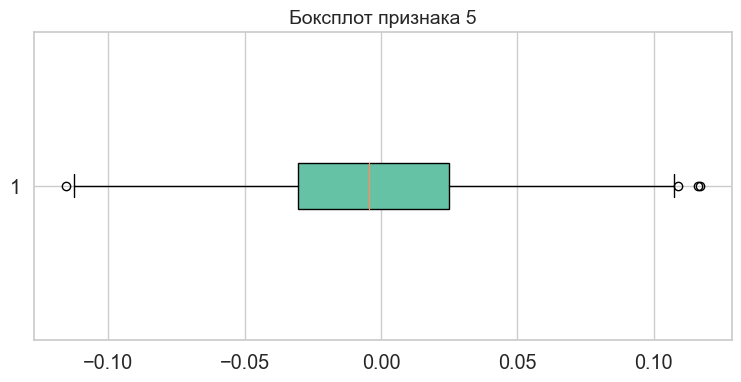

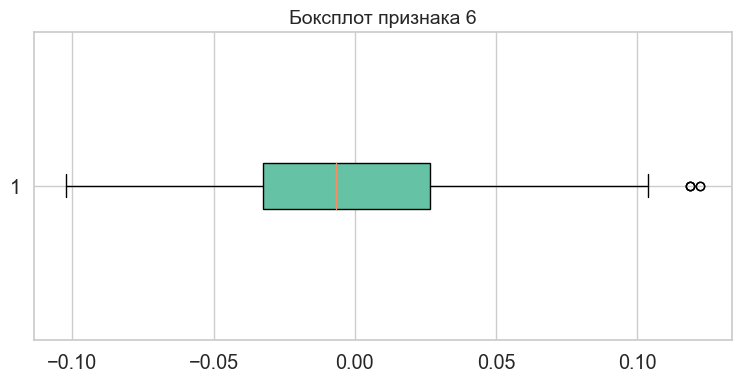

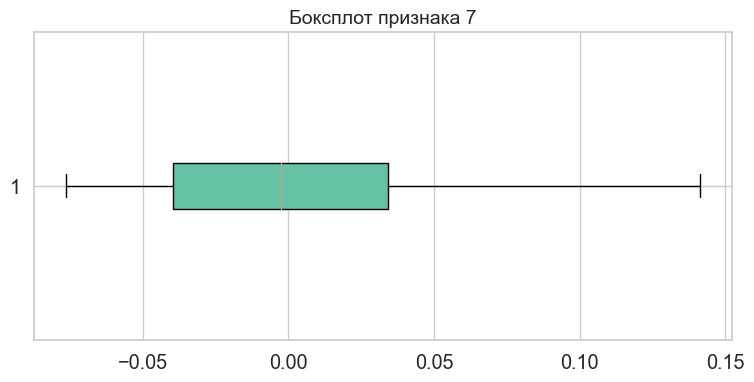

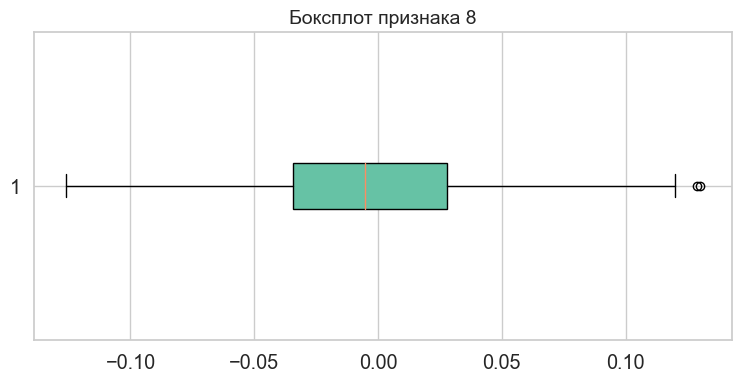

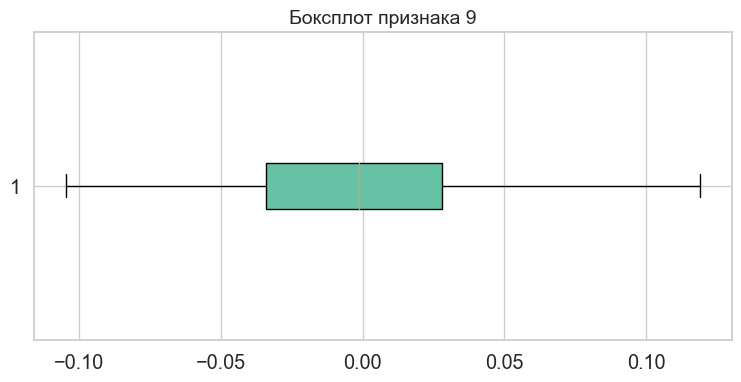

In [338]:
for i in range(10):
    plt.figure(figsize=(9, 4))
    plt.boxplot(x = mat[:,i], vert=False, patch_artist=True)
    plt.title(f'Боксплот признака {i}', fontsize=14)
plt.show()

In [348]:
X, y = mat[:, :10], mat[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [349]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X = X_train)
X_test = scaler.transform(X = X_test)
X_val = scaler.transform(X = X_val)

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [350]:
max_depth = 3
clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

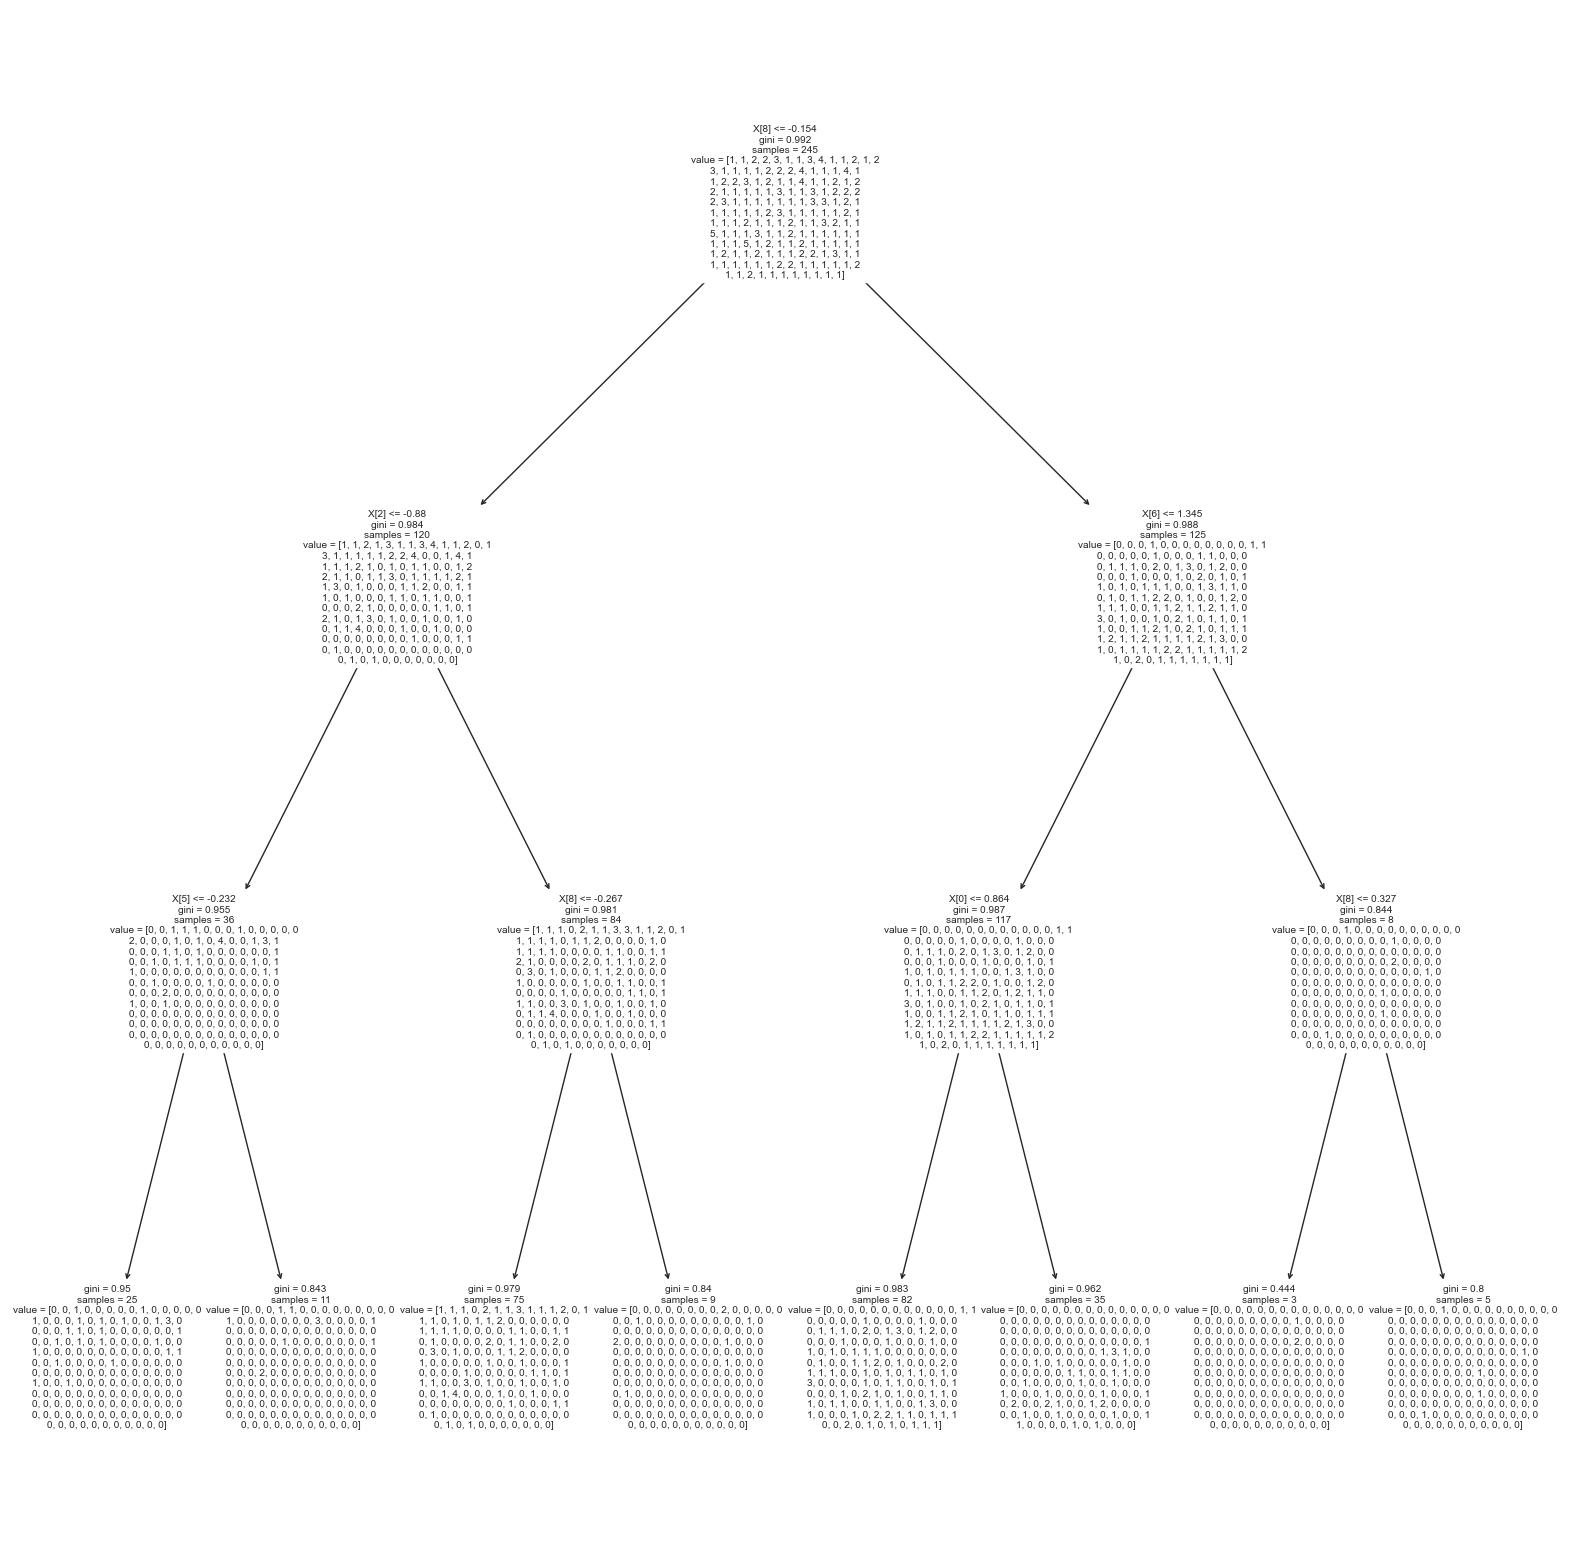

In [351]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

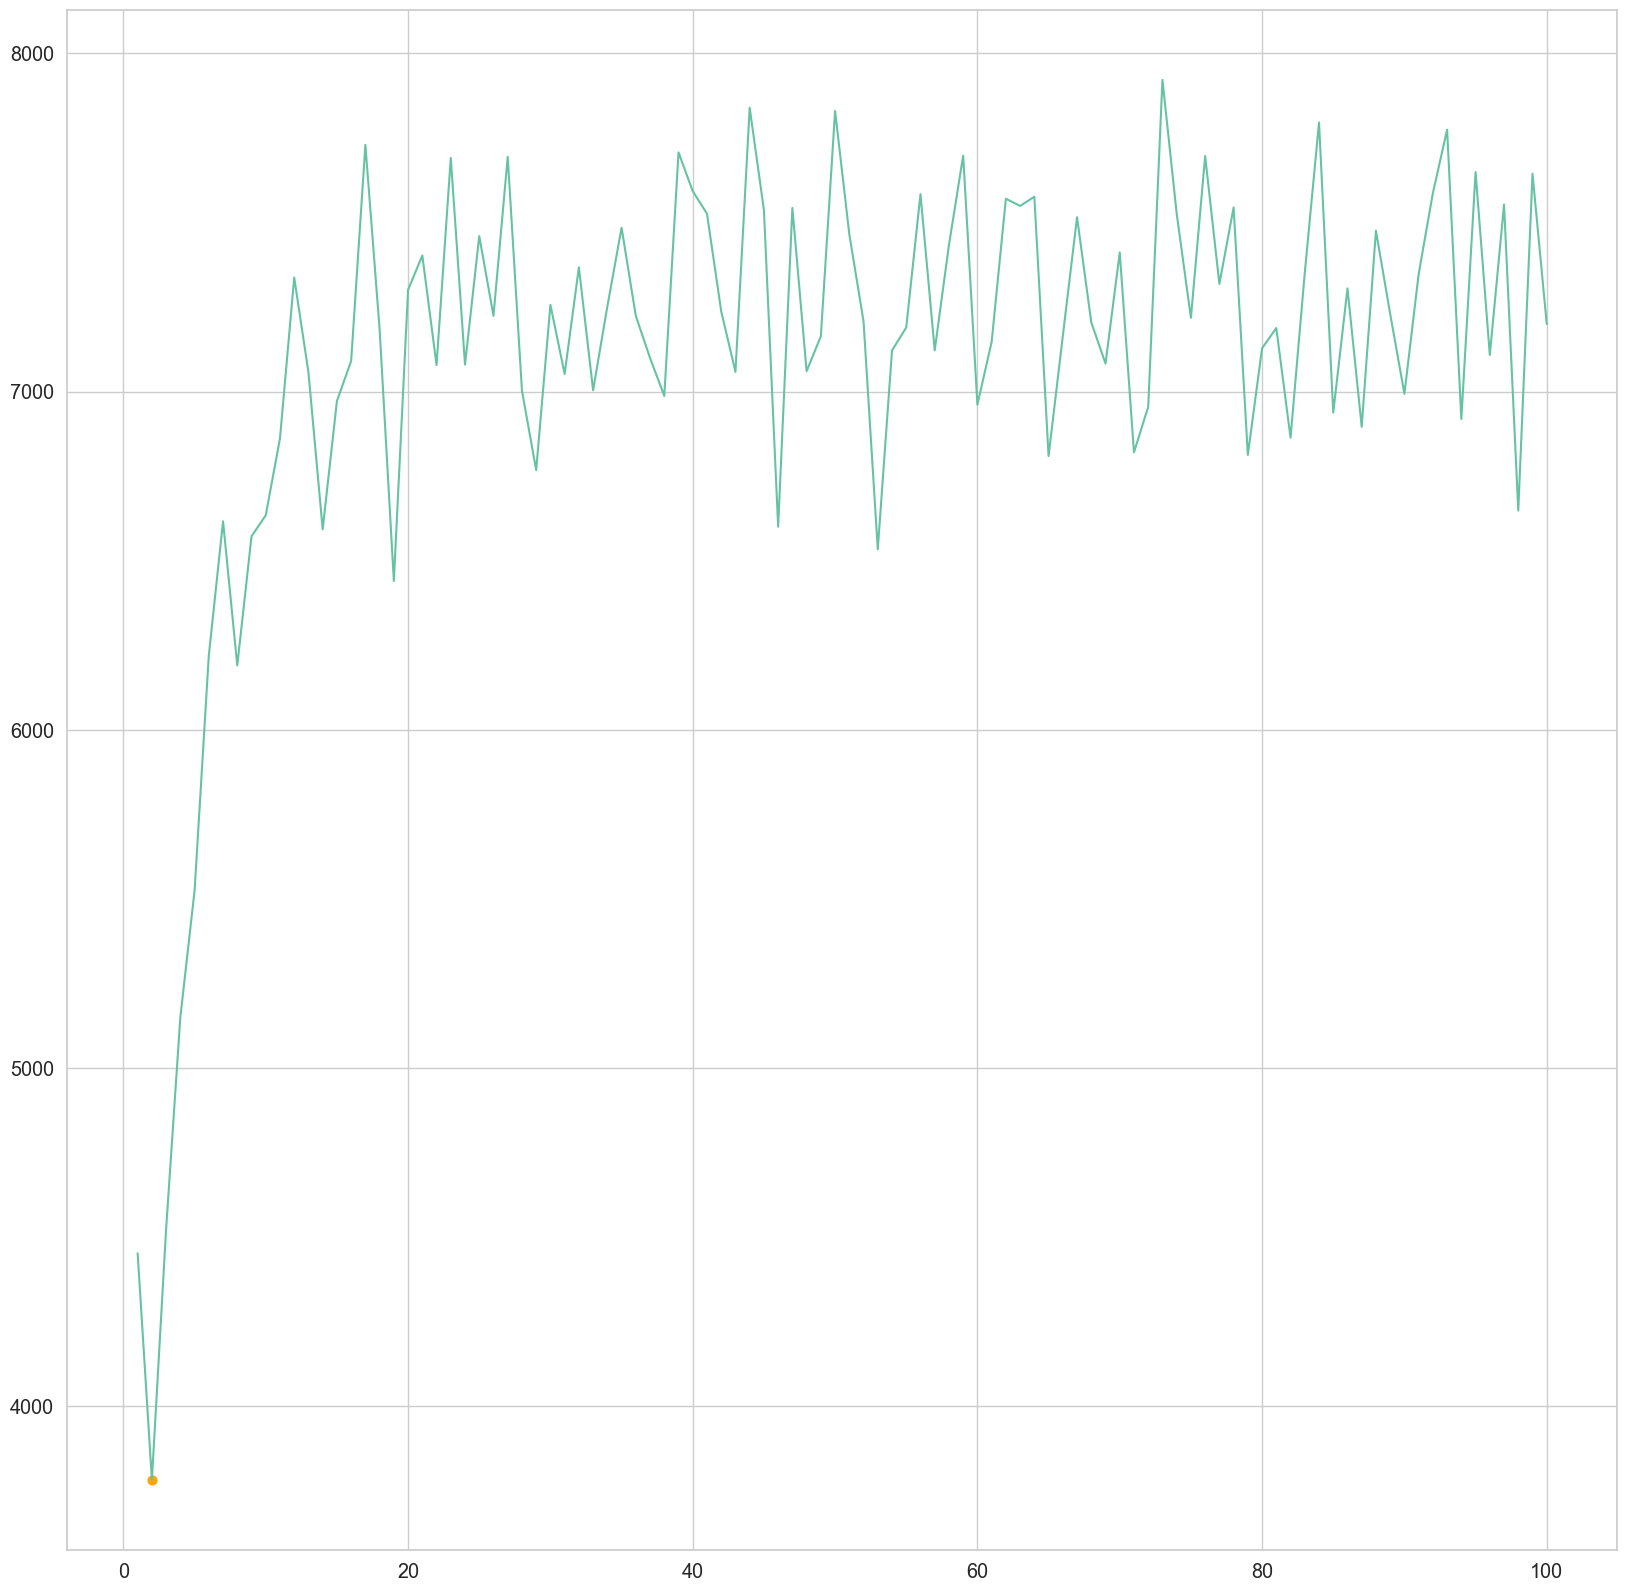

2 3782.81


In [352]:
depths_MSE = []
for i in np.arange(100)+1:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    depths_MSE.append(np.round(mean_squared_error(y_val, pred), 3))
    
plt.figure(figsize=(20, 20))
plt.plot(np.arange(100) + 1, depths_MSE)
mask = depths_MSE.index(np.array(depths_MSE).min())
x = np.arange(100) + 1
plt.scatter(x[mask], depths_MSE[mask], color='orange', s=40, marker='o')
plt.show()
print(x[mask], depths_MSE[mask])

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

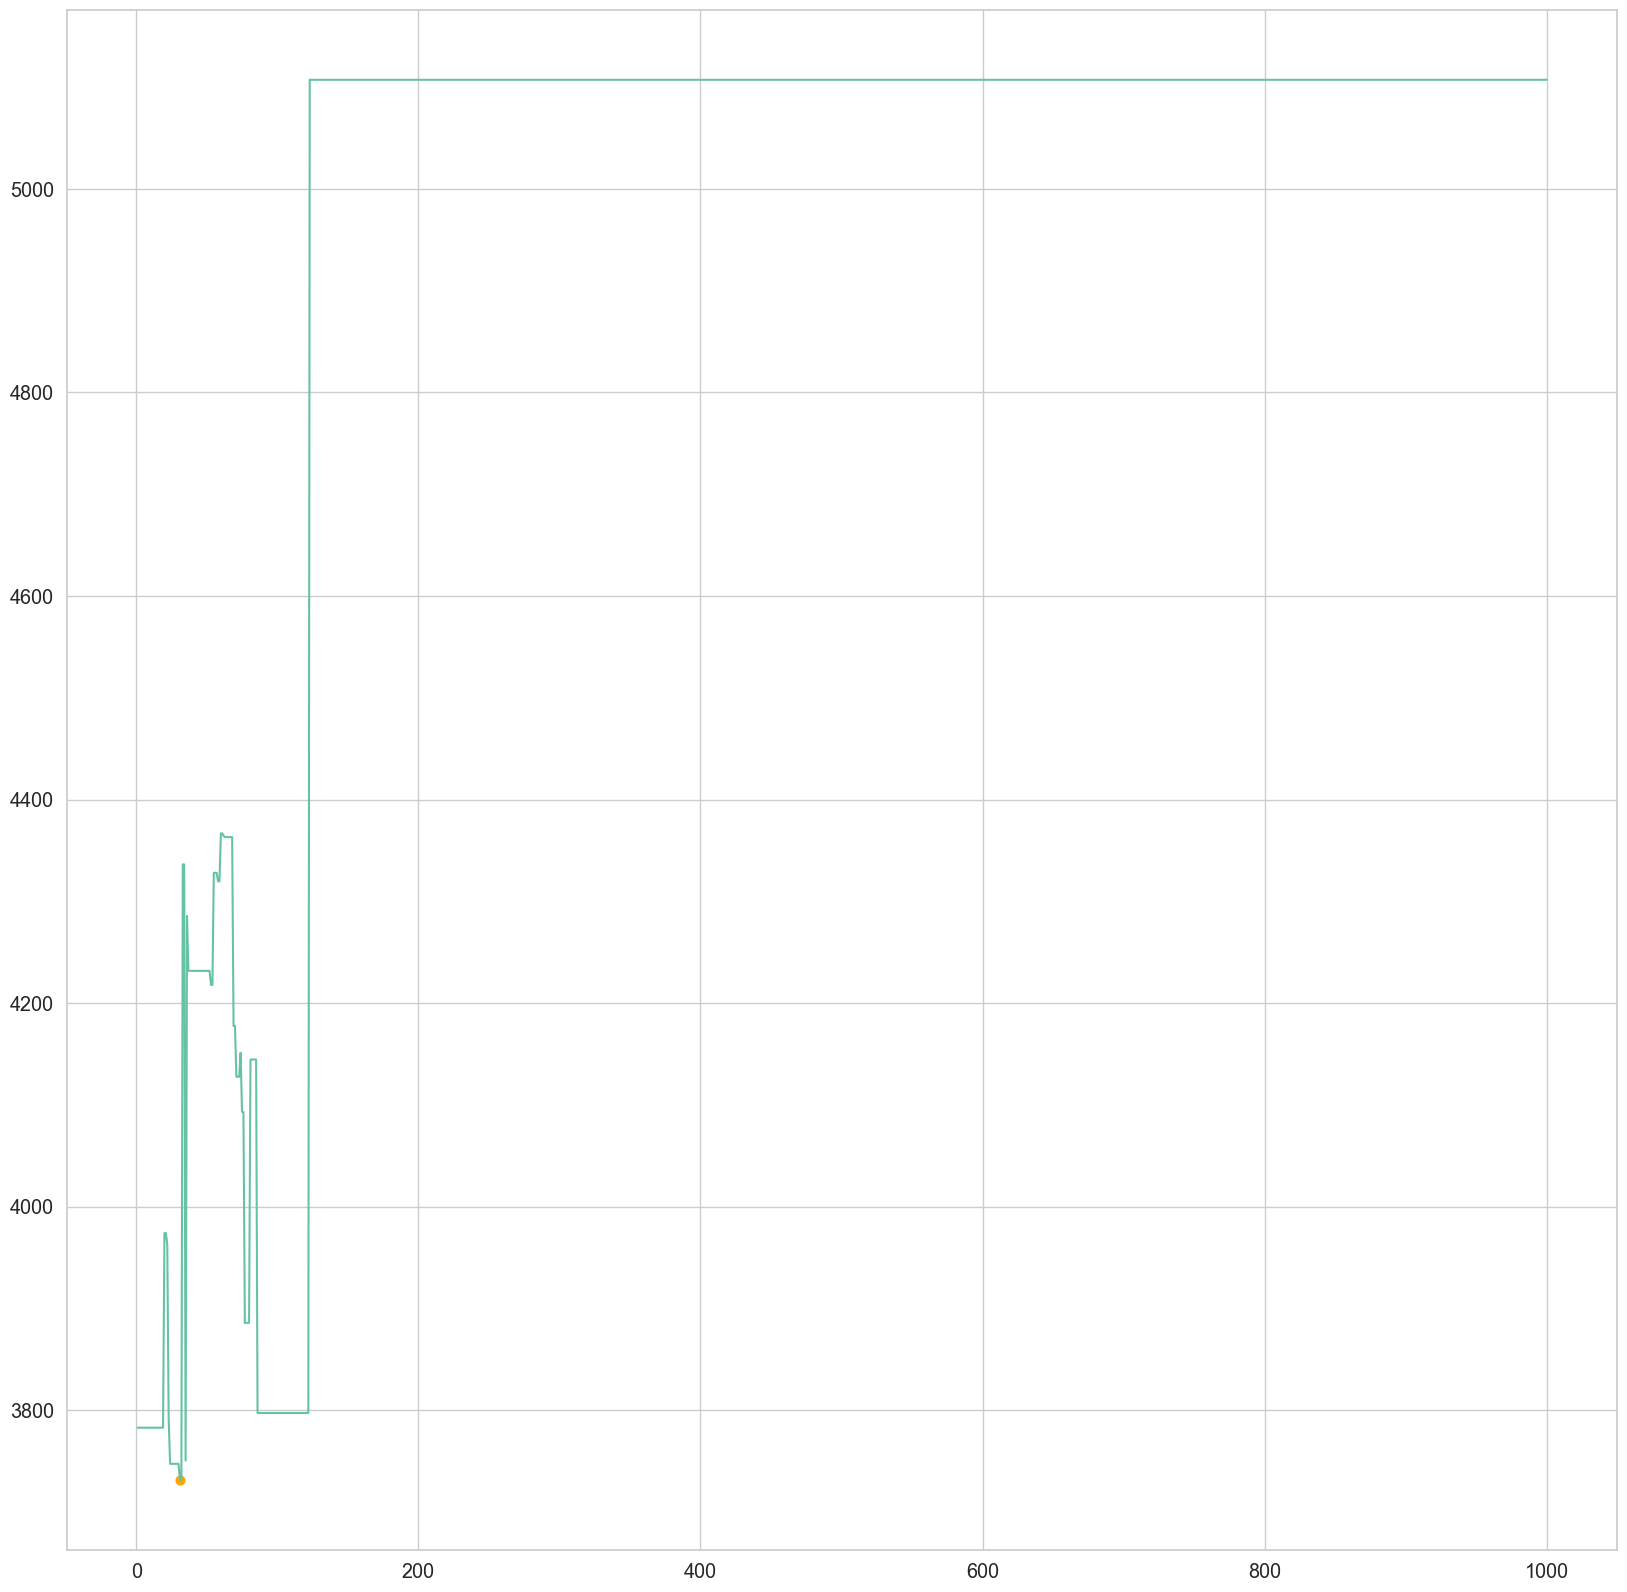

31 3731.605


In [354]:
max_depth = 2

depths_MSE = []
for i in np.arange(1000)+1:
    model = DecisionTreeRegressor(min_samples_leaf=i, max_depth = max_depth)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    depths_MSE.append(np.round(mean_squared_error(y_val, pred), 3))
    
plt.figure(figsize=(20, 20))
plt.plot(np.arange(1000)+1, depths_MSE)
mask = depths_MSE.index(np.array(depths_MSE).min())
x = np.arange(1000)+1
plt.scatter(x[mask], depths_MSE[mask], color='orange', s=40, marker='o')
plt.show()
print(x[mask], depths_MSE[mask])

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

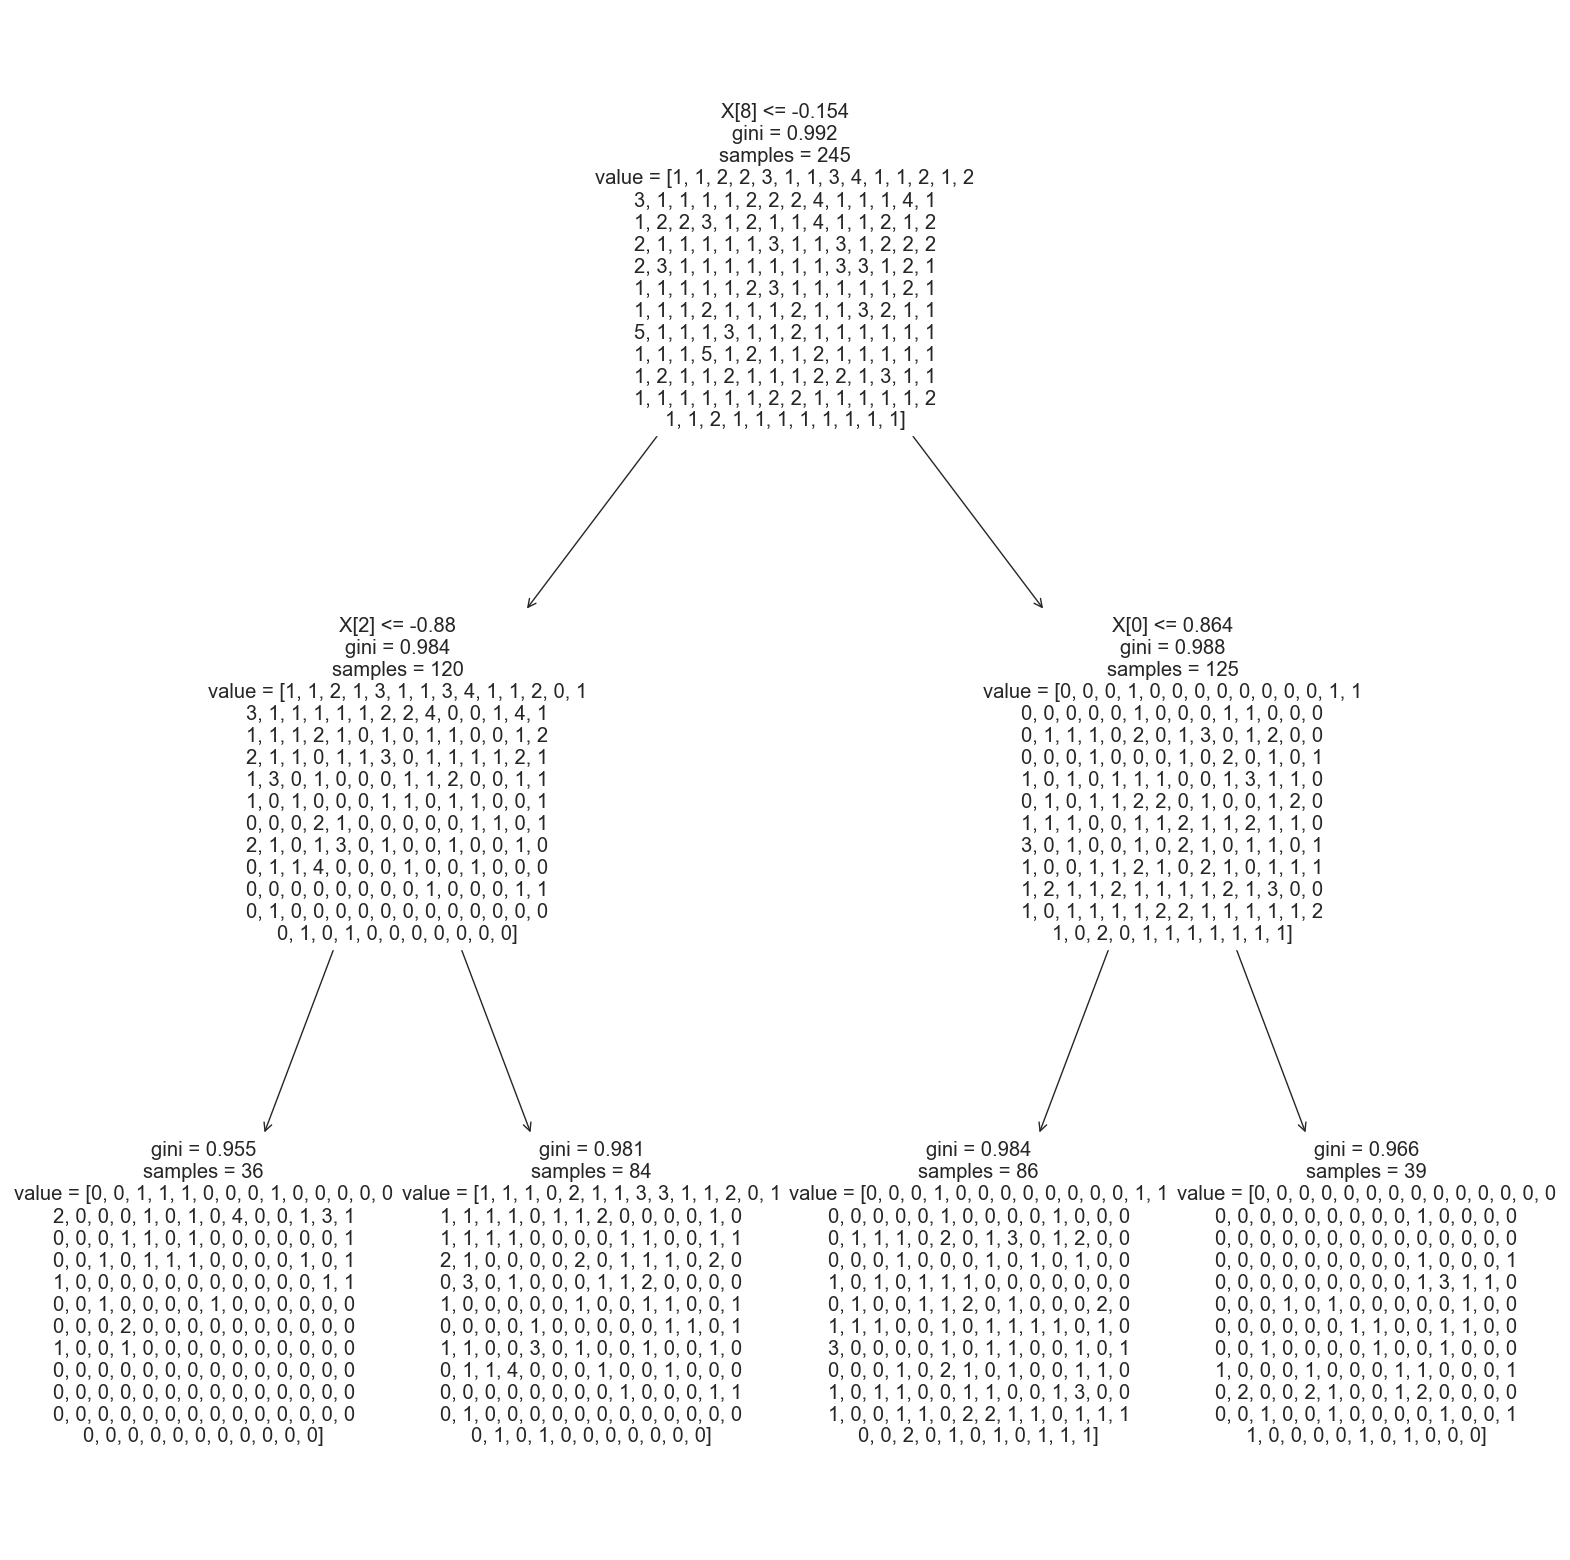

In [355]:
clf = DecisionTreeClassifier(max_depth = 2, random_state=42, min_samples_leaf=31)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

In [356]:
model = DecisionTreeRegressor(min_samples_leaf=30, max_depth = 2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
np.round(mean_squared_error(y_test, pred), 3)

4120.677

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

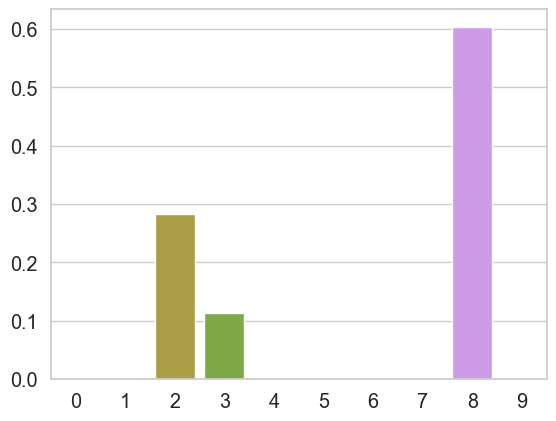

In [357]:
importances = model.feature_importances_
sns.barplot(x = np.arange(X_train.shape[1]), y = importances)
plt.show()

Сделайте выводы.

**Вывод:** Признак 1 неравномерный (он обозначает пол - категориальный - не поняла, почему он принимает такие значения), медиана находится сильно левее, макимальная глубина дерева получилась = 2, а минимальное число объектов = 30. Важными признаками стали 2,3 и наиболее - 8. MSE на test выборке больше, чем на val

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [393]:
X, y = mat[:, :10], mat[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X = X_train)
X_test = scaler.transform(X = X_test)
X_val = scaler.transform(X = X_val)

model = RandomForestRegressor(n_estimators = 500)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

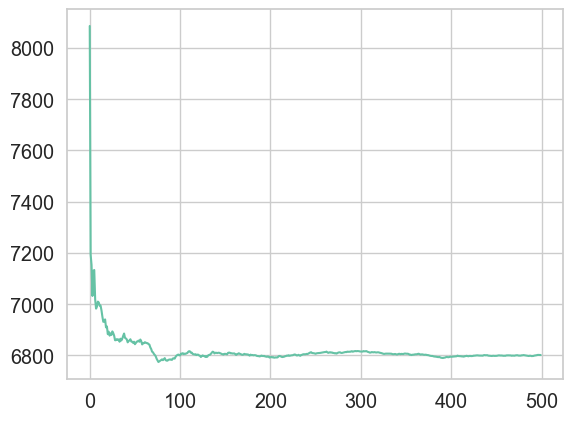

In [406]:
MSE = []
for i in np.arange(500)+1:
    preds = []
    for j in np.arange(0, i):
        model.estimators_[j].fit(X_train, y_train)
        pred = model.estimators_[j].predict(X_val)
        preds.append(pred)
    pred = np.array(preds).mean(axis = 0)
    MSE.append(np.round(mean_squared_error(y_val, pred), 3))
    
plt.plot(np.arange(500), MSE)
plt.show()

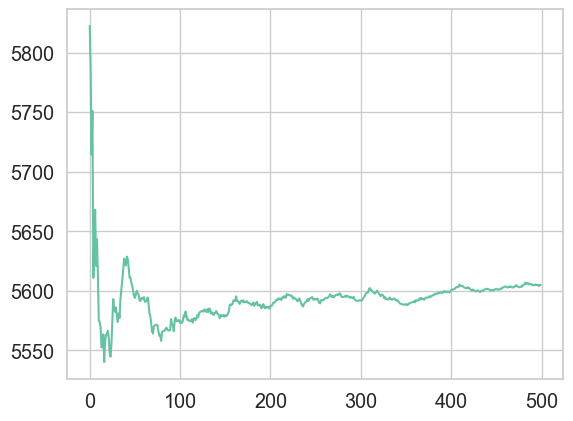

In [407]:
MSE = []
for i in np.arange(500)+1:
    preds = []
    for j in np.arange(0, i):
        model.estimators_[j].fit(X_train, y_train)
        pred = model.estimators_[j].predict(X_test)
        preds.append(pred)
    pred = np.array(preds).mean(axis = 0)
    MSE.append(np.round(mean_squared_error(y_test, pred), 3))
    
plt.plot(np.arange(500), MSE)
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

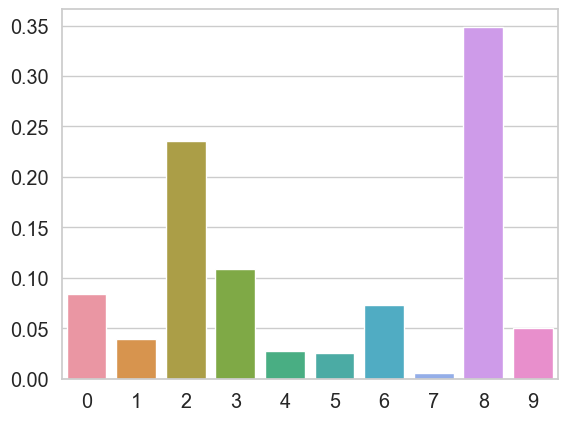

In [399]:
importances = model.feature_importances_
sns.barplot(x = np.arange(X_train.shape[1]), y = importances)
plt.show()

Сделайте выводы.

**Вывод:** C увеличением числа деревьев улучшается предсказание леса на валидационной - даже становится постоянным, а вот на тестовой улучшается только до определенного момента, затем заметнее мтановится ухудшение. Аналогично дереву используется 2, 3 и наиболее - 8 признаки, но в лесу присутствует вклад и других признаков, что не наблюдалось у дерева.